# Support Vector Machine Explained with NN comparison
ref. https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413

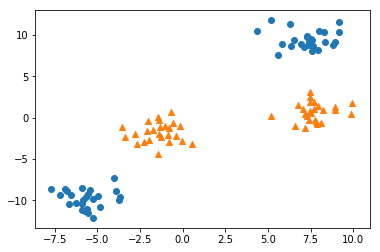

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

X_x = X[:, 0]
X_y = X[:, 1]

plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')

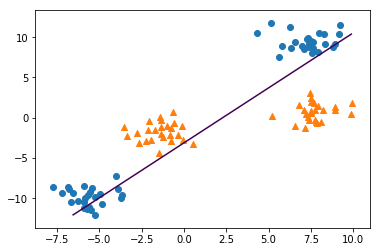

In [2]:
import numpy as np
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

xx = np.linspace(X_x.min(), X_x.max(), 1000)
yy = np.linspace(X_y.min(), X_y.max(), 1000)

XX, YY = np.meshgrid(xx, yy)

dec = linear_svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[0])

plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')

In [3]:
X[:3]

array([[-1.72161036, -1.48033142],
       [-3.6573384 , -9.5482383 ],
       [ 7.0778163 ,  0.99508772]])

In [4]:
X[:, 1][:3]

array([-1.48033142, -9.5482383 ,  0.99508772])

In [5]:
X[:, 1:][:3]

array([[-1.48033142],
       [-9.5482383 ],
       [ 0.99508772]])

In [6]:
(X[:, 1:] ** 2)[:3]

array([[  2.19138111],
       [ 91.16885455],
       [  0.99019957]])

In [7]:
X_new = np.hstack([X, X[:, 1:] ** 2])
X_new[:3]

array([[ -1.72161036,  -1.48033142,   2.19138111],
       [ -3.6573384 ,  -9.5482383 ,  91.16885455],
       [  7.0778163 ,   0.99508772,   0.99019957]])

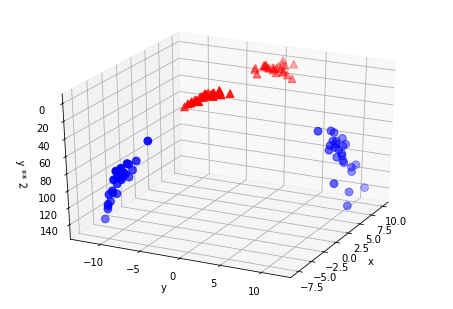

In [8]:
# add the squared first feature
# hstack: Stack arrays in sequence horizontally (column wise).
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D
# visualize in 3D
ax = Axes3D(plt.figure(), elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
ax.scatter(X_new[y == 0, 0], X_new[y == 0, 1], X_new[y == 0, 2], c='b', marker='o', s=60)
ax.scatter(X_new[y == 1, 0], X_new[y == 1, 1], X_new[y == 1, 2], c='r', marker='^', s=60)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("y ** 2")

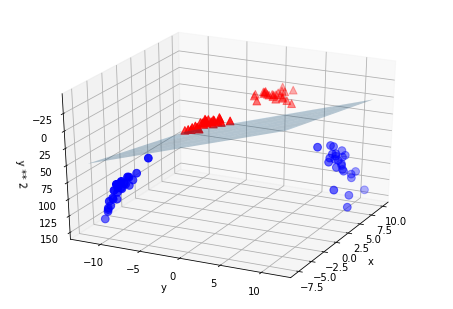

In [9]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
ax = Axes3D(plt.figure(), elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[y == 0, 0], X_new[y == 0, 1], X_new[y == 0, 2], c='b', marker='o', s=60)
ax.scatter(X_new[y == 1, 0], X_new[y == 1, 1], X_new[y == 1, 2], c='r', marker='^', s=60)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("y ** 2")

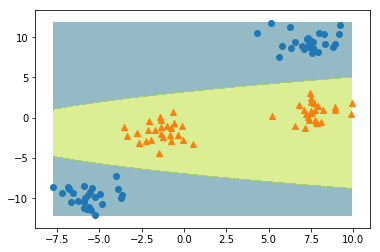

In [10]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], alpha=0.5)

plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')

In [11]:
def plot_2d_separator(classifier, X, ax=None):
    X_x = X[:, 0]
    X_y = X[:, 1]

    xx = np.linspace(X_x.min(), X_x.max(), 100)
    yy = np.linspace(X_y.min(), X_y.max(), 100)

    # Matplotlib Tutorial: Contour Plots
    # ref. http://www.python-course.eu/matplotlib_contour_plot.php
    
    # Return coordinate matrices from coordinate vectors.
    # (100, 100)
    XX, YY = np.meshgrid(xx, yy)

    # (10000, 2)
    try:
        dec = classifier.decision_function(
            np.c_[XX.ravel(), YY.ravel()])
        levels=[0]
    except AttributeError:
        dec = classifier.predict_proba(
            np.c_[XX.ravel(), YY.ravel()])[:, 1]
        levels=[0.5]

    if ax is None:
        ax = plt.gca()

    ax.contour(XX, YY, dec.reshape(XX.shape), levels=levels)

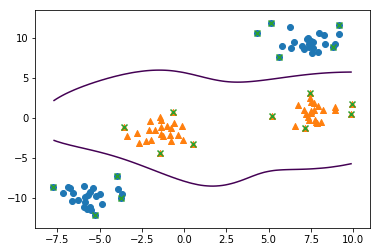

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
plot_2d_separator(svm, X)
# plot data
plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')

# plot support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], marker='x')

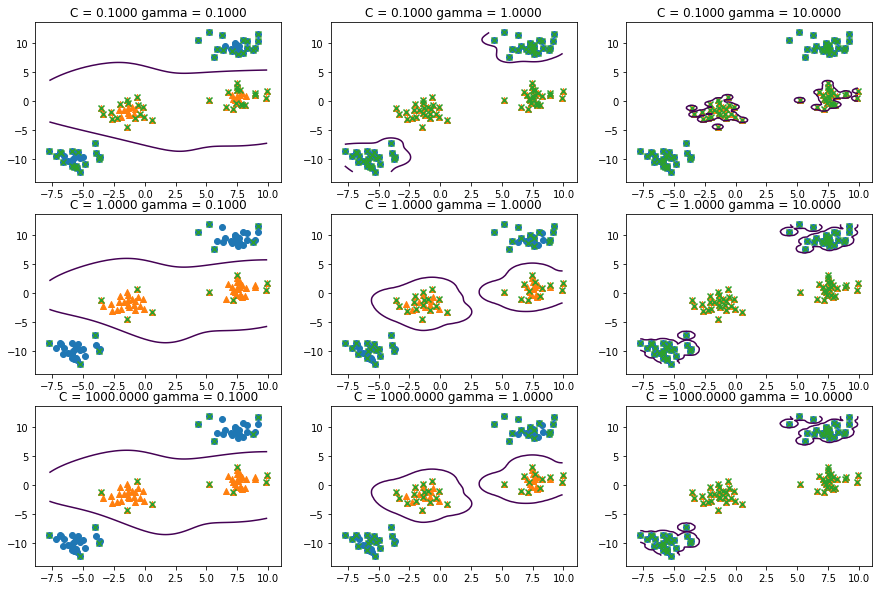

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        a.set_title("C = %.4f gamma = %.4f" % (10. ** C, 10. ** gamma))
        svm = SVC(kernel='rbf', C=10. ** C, gamma=10. ** gamma).fit(X, y)                                                
        plot_2d_separator(svm, X, ax=a)
        # plot data
        a.scatter(X_x[y == 0], X_y[y == 0], marker='o')
        a.scatter(X_x[y == 1], X_y[y == 1], marker='^')
        
        # plot support vectors
        sv = svm.support_vectors_
        a.scatter(sv[:, 0], sv[:, 1], marker='x')

- Going from left to right, we increase the value of the parameter *gamma* from 0.1 to 10. A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by. This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right.
- Going from top to bottom, we increase the *C* parameter from 0.1 to 1000. As with the linear models, a small C means a very restricted model, where each data point can only have very limited influence. Increasing C allows these points to have a stronger influence on the model and makes the decision boundary bend to correctly classify them.

# Neural Networks
By default, the MLP uses 100 hidden nodes.

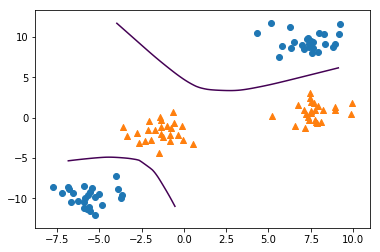

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=[1000]).fit(X_train, y_train)
plot_2d_separator(mlp, X_test)

plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')

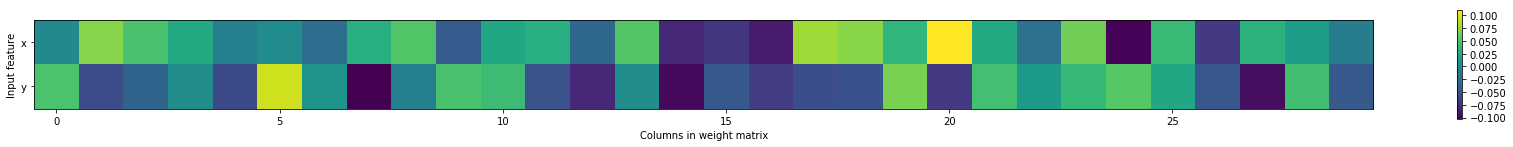

In [15]:
plt.figure(figsize=(30, 2))
plt.imshow(mlp.coefs_[0][:, :30], interpolation='none', cmap='viridis')
plt.yticks(range(2), ["x", "y"])
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# Keras Implementation

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

# 1000 * 1
model.add(Dense(1000, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 4,001.0
Trainable params: 4,001.0
Non-trainable params: 0.0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, epochs=1000, verbose=0)

In [18]:
evaluation = model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

25/25 [==============================] - 0s
Summary: Loss over the test dataset: 0.00, Accuracy: 1.00


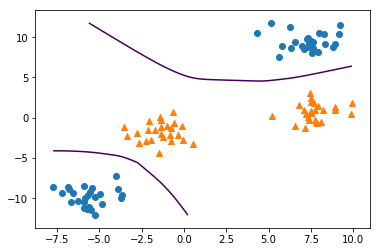

In [19]:
X_x = X[:, 0]
X_y = X[:, 1]

xx = np.linspace(X_x.min(), X_x.max(), 100)
yy = np.linspace(X_y.min(), X_y.max(), 100)

XX, YY = np.meshgrid(xx, yy)

dec = model.predict(np.c_[XX.ravel(), YY.ravel()])
levels=[0.5]

plt.contour(XX, YY, dec.reshape(XX.shape), levels=levels)

plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

# 1000 * 1000 * 1
model.add(Dense(1000, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1001      
Total params: 1,005,001.0
Trainable params: 1,005,001.0
Non-trainable params: 0.0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, epochs=1000, verbose=0)

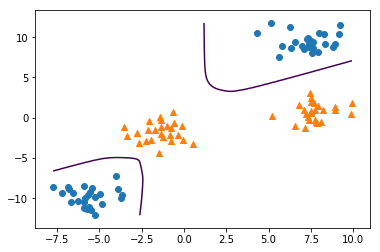

In [22]:
dec = model.predict(np.c_[XX.ravel(), YY.ravel()])
levels=[0.5]

plt.contour(XX, YY, dec.reshape(XX.shape), levels=levels)

plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')

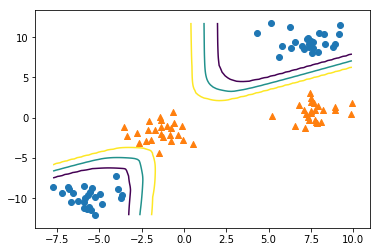

In [23]:
levels=[0.001, 0.5, 0.999]

plt.contour(XX, YY, dec.reshape(XX.shape), levels=levels)

plt.scatter(X_x[y == 0], X_y[y == 0], marker='o')
plt.scatter(X_x[y == 1], X_y[y == 1], marker='^')